In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import minmax_scale

In [3]:
diversity_school = pd.read_csv('diversity_school.csv')
historical_tuition = pd.read_csv('historical_tuition.csv')
salary_potential = pd.read_csv('salary_potential.csv')
tuition_cost = pd.read_csv('tuition_cost.csv')
tuition_income = pd.read_csv('tuition_income.csv')

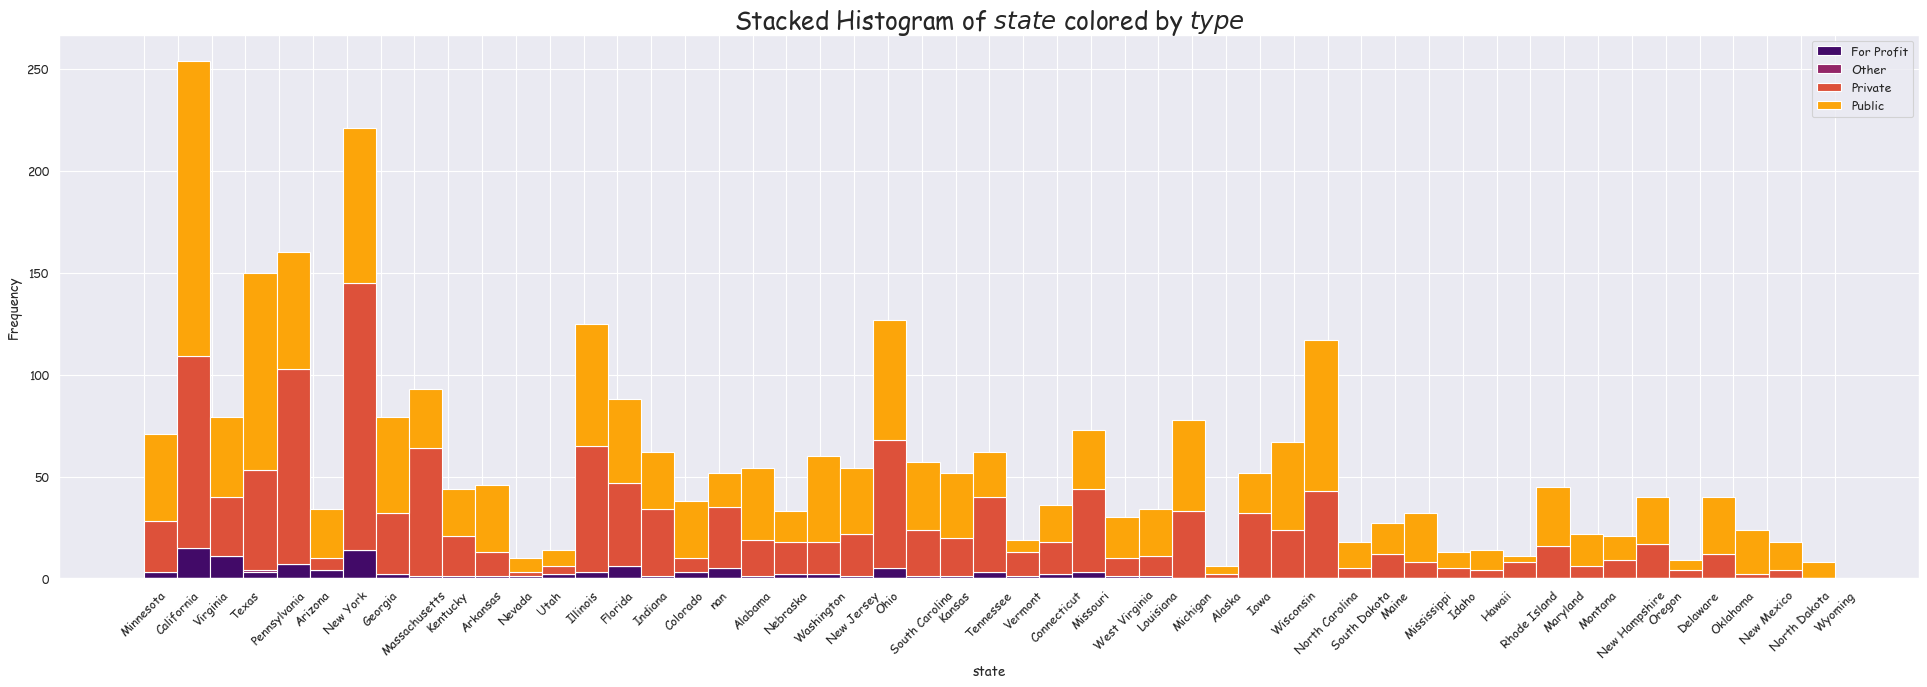

In [466]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('Comic Sans MS')
font.set_name('Comic Sans')

x_var = 'state'
groupby_var = 'type'
df_agg = tuition_cost.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(30,9), dpi= 80)
colors = [(*sns.color_palette('inferno', len(vals))[i], 1.0) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, tuition_cost[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(tuition_cost[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.xticks(rotation = 45)
plt.ylabel("Frequency")


plt.savefig('hist1.png')
plt.show()

In [224]:
def myround(x, base=5):
    return base * np.around(x / base)

In [236]:
uq = np.unique(salary_potential['make_world_better_percent'].unique())
uq = uq[~np.isnan(uq)]

In [333]:
df1 = pd.DataFrame(index=salary_potential.state_name.unique(), columns=np.unique(np.apply_along_axis(myround, 0, uq)))
df2 = pd.DataFrame(index=salary_potential.state_name.unique(), columns=np.unique(np.apply_along_axis(myround, 0, uq)))

In [334]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [335]:
for row in df1:
    for element in df1[row].keys():
        df1[row][element] = salary_potential.loc[(salary_potential['state_name'] == element) & (np.apply_along_axis(myround, 0, salary_potential['make_world_better_percent']) == row)]['early_career_pay'].astype(float).mean()

<ipython-input-335-4ee5b31a438a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[row][element] = salary_potential.loc[(salary_potential['state_name'] == element) & (np.apply_along_axis(myround, 0, salary_potential['make_world_better_percent']) == row)]['early_career_pay'].astype(float).mean()


In [336]:
for row in df2:
    for element in df2[row].keys():
        df2[row][element] = salary_potential.loc[(salary_potential['state_name'] == element) & (np.apply_along_axis(myround, 0, salary_potential['make_world_better_percent']) == row)]['mid_career_pay'].astype(float).mean()

<ipython-input-336-671296f70926>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[row][element] = salary_potential.loc[(salary_potential['state_name'] == element) & (np.apply_along_axis(myround, 0, salary_potential['make_world_better_percent']) == row)]['mid_career_pay'].astype(float).mean()


In [414]:
sns.set(font='Comic Sans MS')

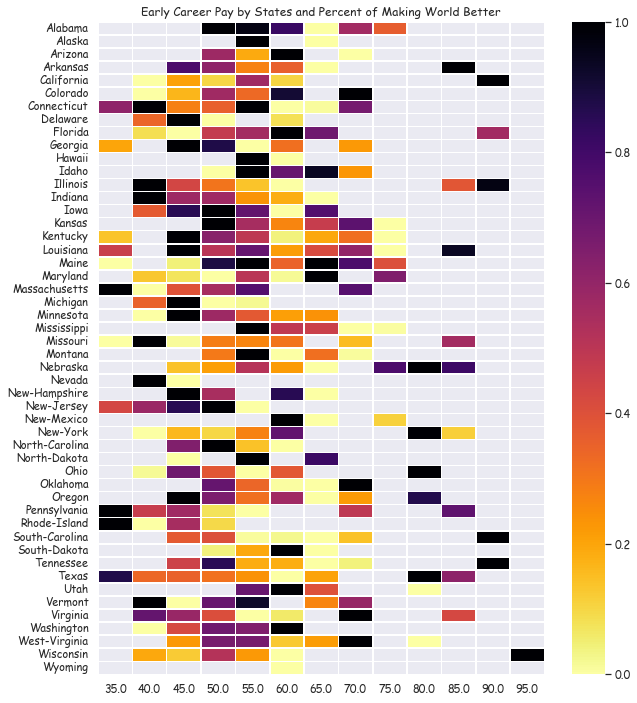

In [529]:
fig, ax = plt.subplots(figsize=(10,12))  
ax.set_title('Early Career Pay by States and Percent of Making World Better')
sns_plot = sns.heatmap(pd.DataFrame(minmax_scale(df1, axis=1), index=df1.index, columns=df1.columns), linewidths=.5, cmap='inferno_r')
sns_plot.figure.savefig('hist2.png')

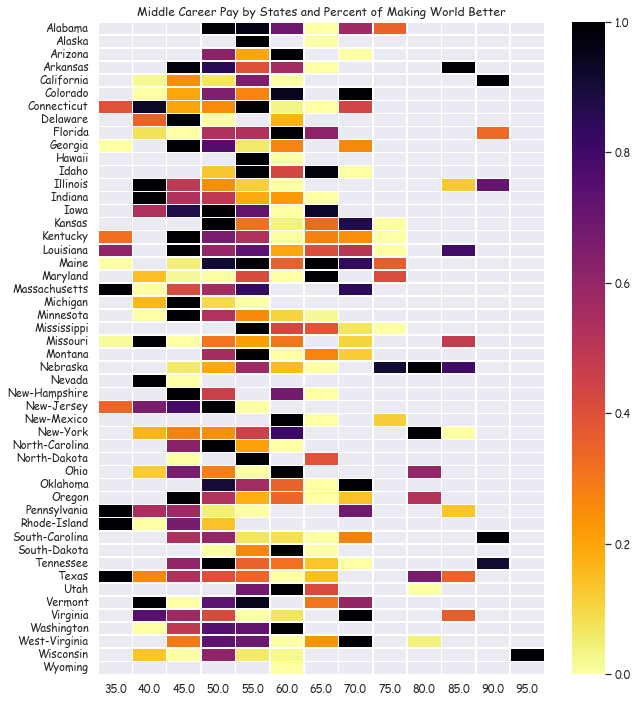

In [530]:
fig, ax = plt.subplots(figsize=(10,12))  
ax.set_title('Middle Career Pay by States and Percent of Making World Better')
sns_plot = sns.heatmap(pd.DataFrame(minmax_scale(df2, axis=1), index=df2.index, columns=df2.columns), linewidths=.5, ax=ax, cmap='inferno_r')

sns_plot.figure.savefig('hist3.png')

<Figure size 432x288 with 0 Axes>

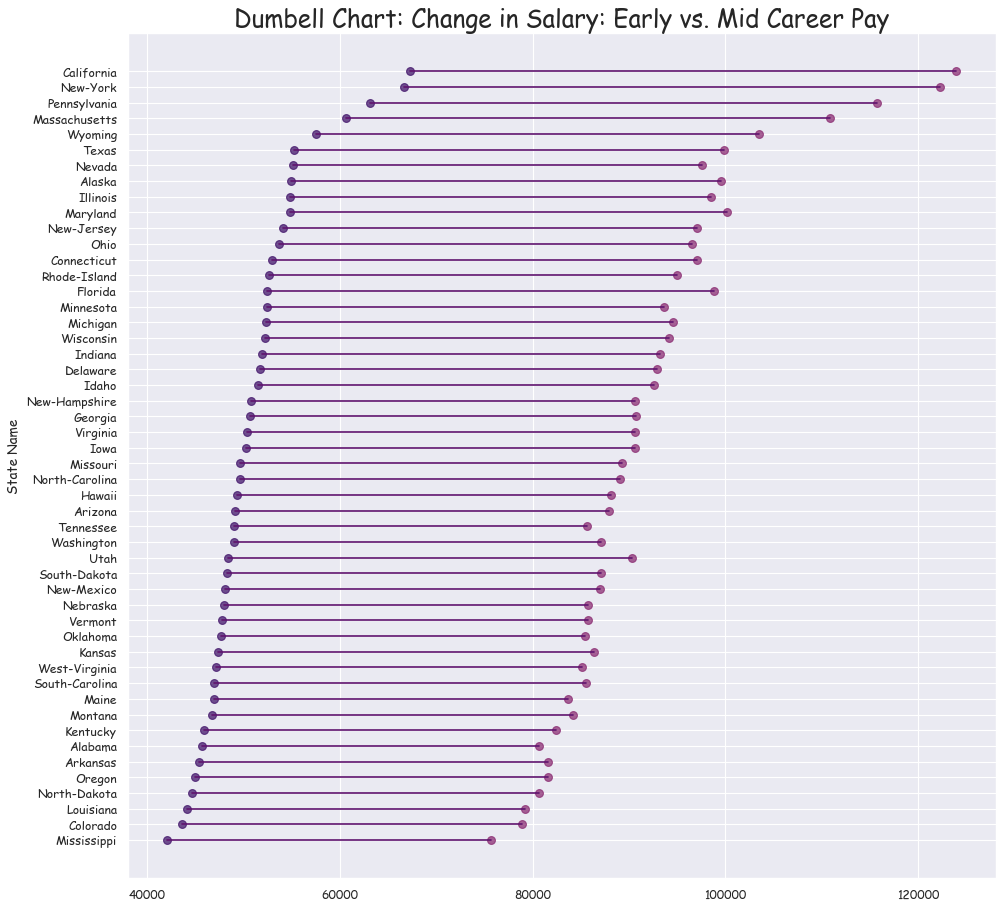

In [500]:
import matplotlib.lines as mlines

plt.inferno()

names = salary_potential.sort_values('early_career_pay').state_name.unique()
early = salary_potential.groupby('state_name')['early_career_pay'].mean().sort_values()
mid = salary_potential.groupby('state_name')[['mid_career_pay', 'early_career_pay']].mean().sort_values('early_career_pay').drop(columns='early_career_pay').squeeze()

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=sns.color_palette('inferno', n_colors=10)[2])
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

ax.scatter(y=names, x=early, s=50, color=sns.color_palette('inferno', n_colors=10)[1], alpha=0.7)
ax.scatter(y=names, x=mid, s=50, color=sns.color_palette('inferno', n_colors=10)[3], alpha=0.7)

for i, p1, p2 in zip(names, early, mid):
    newline([p1, i], [p2, i])

ax.set_title("Dumbell Chart: Change in Salary: Early vs. Mid Career Pay", fontdict={'size':22})
ax.set(ylabel='State Name')
plt.savefig('hist4.jpeg')
plt.show()